# Analysis of Immigration Canada Subreddit

## Data Cleaning

In [95]:
# Importing libraries
import pandas as pd
import datetime as dt
from datetime import datetime
import seaborn as sns
from ydata_profiling import ProfileReport
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
palette = sns.color_palette("Paired")

### Data Import

In [96]:
# Importing reddit data from csv
df_all = pd.read_csv('reddit_all_posts.csv')
df_all.name = 'df_all'
df_mixed = pd.read_csv('reddit_mixed_posts.csv')
df_mixed.name = 'df_mixed'
df_top = pd.read_csv('reddit_top_posts.csv')
df_top.name = 'df_top'

# Ensuring 'selftext' column or submission body type string
df_all['selftext'] = df_all['selftext'].astype(str)
df_mixed['selftext'] = df_mixed['selftext'].astype(str)
df_top['selftext'] = df_top['selftext'].astype(str)

# Rename
df_top = df_top.rename(columns={"created":"created_utc"})

### Missing body submission

In [97]:
# Identify the columns with duplicate submission or missing submission body
boolean = df_all.duplicated(subset=['selftext'])

In [98]:
df_all[boolean]['selftext']

14                                                     nan
15                                                     nan
25                                                     nan
31                                                     nan
35                                                     nan
                               ...                        
63816                                            [removed]
63817    My brother is in his mid 20s and has worked fo...
63818                                            [removed]
63819                                            [removed]
63820                                            [removed]
Name: selftext, Length: 63217, dtype: object

In [99]:
# Identify the number of submission body removed
df_all[df_all['selftext'] == '[removed]'].count()

Unnamed: 0         21679
Year               21679
selftext           21679
author             21679
author_fullname    17303
title              21679
link_flair_text    18237
ups                  373
num_comments       21679
id                 21679
media_embed        21679
created_utc        21679
upvote_ratio       20986
dtype: int64

In [100]:
# View submissions with submission body removed to identify if these records should be removed
df_all[df_all['selftext'] == '[removed]'].head()

,Unnamed: 0,Year,selftext,author,author_fullname,title,link_flair_text,ups,num_comments,id,media_embed,created_utc,upvote_ratio
321,321,2015,[removed],immigrationxiphias,NaN,Migrate to Canada,NaN,1.0,0,3yncn5,{},2015-12-29 12:10:57,NaN
328,328,2015,[removed],immigrationxiphias,NaN,Canada Immigration Services Calgary,NaN,1.0,0,3y9xlv,{},2015-12-26 10:48:03,NaN
329,329,2015,[removed],[deleted],NaN,Canada Immigration Services Calgary,NaN,1.0,0,3y9wxe,{},2015-12-26 10:37:57,NaN
340,340,2015,[removed],immigrationxiphias,NaN,XIPHIAS IMMIGRATION REVIEWS - CUSTOMER REVIEWS,NaN,1.0,0,3xxptx,{},2015-12-23 06:58:44,NaN
362,362,2015,[removed],ghimmigration,NaN,Golden Hands Immigration Inc. GH Immigration Inc.,NaN,0.0,0,3x1rxa,{},2015-12-16 06:27:00,NaN


In [101]:
# Identify submissions with no submission body
df_all[df_all['selftext'] =='nan'].count()

Unnamed: 0         3084
Year               3084
selftext           3084
author             3084
author_fullname    2234
title              3084
link_flair_text    1864
ups                 605
num_comments       3084
id                 3084
media_embed        3084
created_utc        3084
upvote_ratio       1691
dtype: int64

In [102]:
# View submissions with no submission body to identify if these records should be kept
df_all[df_all['selftext'] == 'nan'].head(5)

,Unnamed: 0,Year,selftext,author,author_fullname,title,link_flair_text,ups,num_comments,id,media_embed,created_utc,upvote_ratio
9,9,2013,nan,CramBoom,NaN,So you think you're Canadian? - Game-show to t...,NaN,1.0,0,1pbs0y,"{'width': 600, 'height': 450, 'content': '&lt;...",2013-10-27 18:31:22,NaN
14,14,2013,nan,ranger28,NaN,Canadian Immigration | live and work in Canada...,NaN,0.0,0,1md4wi,{},2013-09-14 06:22:35,NaN
15,15,2013,nan,[deleted],NaN,Canada’s new immigration program welcomes firs...,NaN,1.0,0,1kknpp,{},2013-08-17 22:32:50,NaN
25,25,2013,nan,ninjah778,NaN,Immigration tips for students/visitors - getti...,NaN,1.0,0,1bflor,{},2013-04-01 17:31:55,NaN
31,31,2013,nan,[deleted],NaN,At the moment. All posts seem to be hitting th...,NaN,4.0,4,189fty,{},2013-02-10 20:05:51,NaN


In [103]:
# Function to remove submissions with removed body or Nan
def submission_body(df):
    """Function to drop rows associated with submissions where selftext is removed or Nan
    Input: Dataframe
    Output: Count of submissions with no body, count of submission with removed body, and dataframe info"""
    no_body = df[df['selftext'] == 'nan']
    removed = df[df['selftext'] == '[removed]']
    df.drop(no_body.index, inplace=True)
    df.drop(removed.index, inplace=True)
    print('Submissions with no body removed:', no_body.count())
    print('Submission with removed body:', removed.count())
    print(df.info())
    return df

In [104]:
# Apply function to current dataframes
df_all_analysis = submission_body(df_all.copy())
df_mixed_analysis = submission_body(df_mixed.copy())
df_top_analysis = submission_body(df_top.copy())

df_all_analysis['link_flair_text'] = df_all_analysis['link_flair_text'].astype(str)
df_mixed_analysis['link_flair_text'] = df_mixed_analysis['link_flair_text'].astype(str)
df_top_analysis['link_flair_text'] = df_top_analysis['link_flair_text'].astype(str)

Submissions with no body removed: Unnamed: 0         3084
Year               3084
selftext           3084
author             3084
author_fullname    2234
title              3084
link_flair_text    1864
ups                 605
num_comments       3084
id                 3084
media_embed        3084
created_utc        3084
upvote_ratio       1691
dtype: int64
Submission with removed body: Unnamed: 0         21679
Year               21679
selftext           21679
author             21679
author_fullname    17303
title              21679
link_flair_text    18237
ups                  373
num_comments       21679
id                 21679
media_embed        21679
created_utc        21679
upvote_ratio       20986
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 39058 entries, 0 to 63817
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       39058 non-null  int64  
 1   Year             3905

### Missing category & Other category

#### Wordcloud of submissions with missing or other category

In [105]:
# Function for worldcloud visualization
def word_cloud(df, category=None):
    # If specific category is not required
    if category is None:
        text = "".join(i for i in df['selftext'])
    # If specific category is required
    else: 
        mask = (df['link_flair_text'].isna())|(df['link_flair_text'] == category)
        df_viz = df[mask]
        text = "".join(i for i in df_viz['selftext'])
    # Stopwords   
    custom_stop_words = ['question', 'really', 'go','years', 'trying', 
                         'advice','anything','take', 'day', 'much', 
                         'think', 'one', 'sure', 'wondering', 'seem', 
                         'ask', 'September', 'make', 'S', 'thinking', 
                         'Canadian', 'going', 'lot', 'hope', 'give', 
                         'Canada', 'know', 'want', 'now', 'will', 'got', 
                         'year', 'still possible', 'need','able', 'apply',
                         'say', 'received', 'U', 'help', 'anyone','month',
                         'looking', 'application']
    stopwords = list(STOPWORDS) + custom_stop_words
    # Visualization
    wordcloud = WordCloud(width=3000, height=2000, random_state=1, background_color='white', colormap='Pastel1', stopwords=stopwords).generate(text)
    # Display wordcloud
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    return None

# Recategorization function
def category_change(row):
    PR_related = ['PR card', 'permanent resident', 'PR']
    student = ['study permit', 'student visa']
    if (row['link_flair_text'] == 'Other')|(row['link_flair_text'] == 'nan'):
        if ('work permit' in row['selftext']):
            row['link_flair_text'] = 'Work Permit'
        elif (x in row['selftext'] for x in student):
            row['link_flair_text'] = 'Study Permit'
        elif ('express entry' in row['selftext']):
            row['link_flair_text'] = 'Express Entry'
        elif any(x in row['selftext'] for x in PR_related):
            row['link_flair_text'] = 'Permanent Resident'
        else: None
    return row


#### All posts

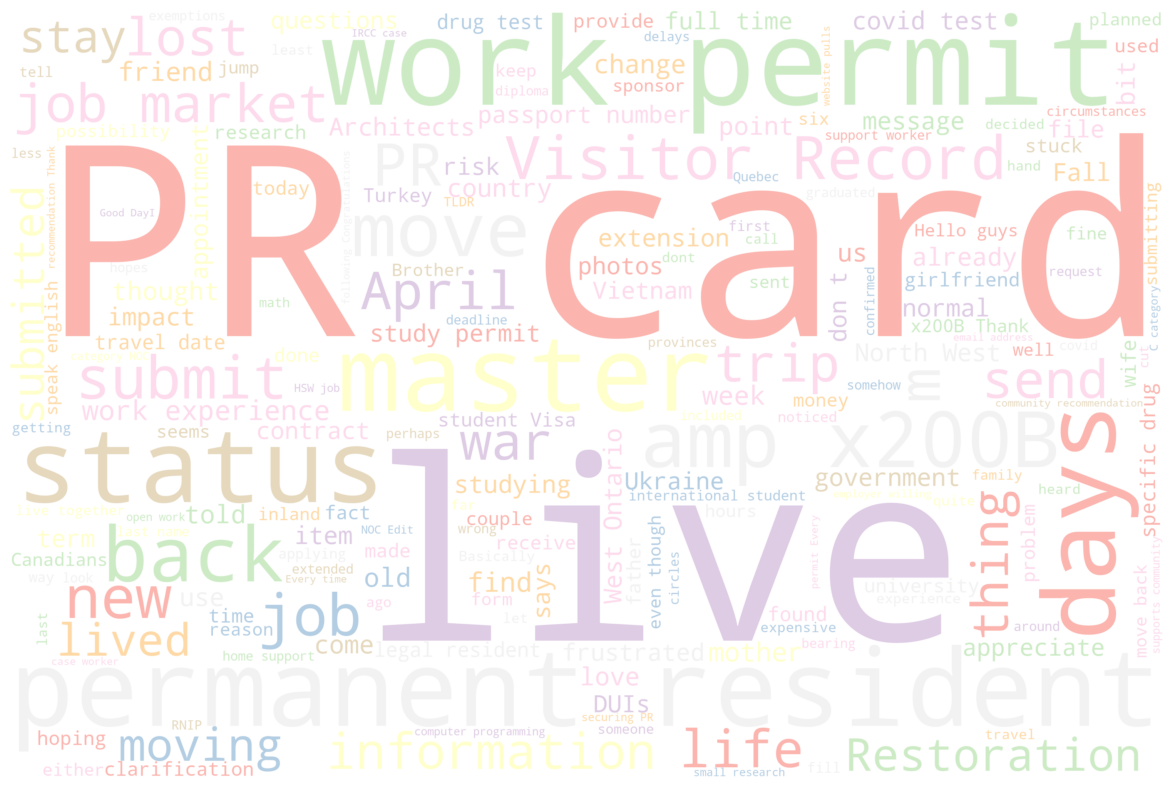

In [106]:
word_cloud(df_all_analysis, 'Other')

In [107]:
df_all_analysis.value_counts('link_flair_text')

link_flair_text
Express Entry      6967
nan                6786
Study Permit       5531
Other              5529
Work Permit        4399
Sponsorship        4220
Visitor Visa       2411
Citizenship        1047
PNP                 893
Working Holiday     757
Quebec              518
dtype: int64

In [108]:
df_all_adj = df_all_analysis.apply(category_change, axis=1)

In [109]:
df_all_adj.value_counts('link_flair_text')

link_flair_text
Study Permit       16534
Express Entry       6967
Work Permit         5711
Sponsorship         4220
Visitor Visa        2411
Citizenship         1047
PNP                  893
Working Holiday      757
Quebec               518
dtype: int64

#### Mixed posts

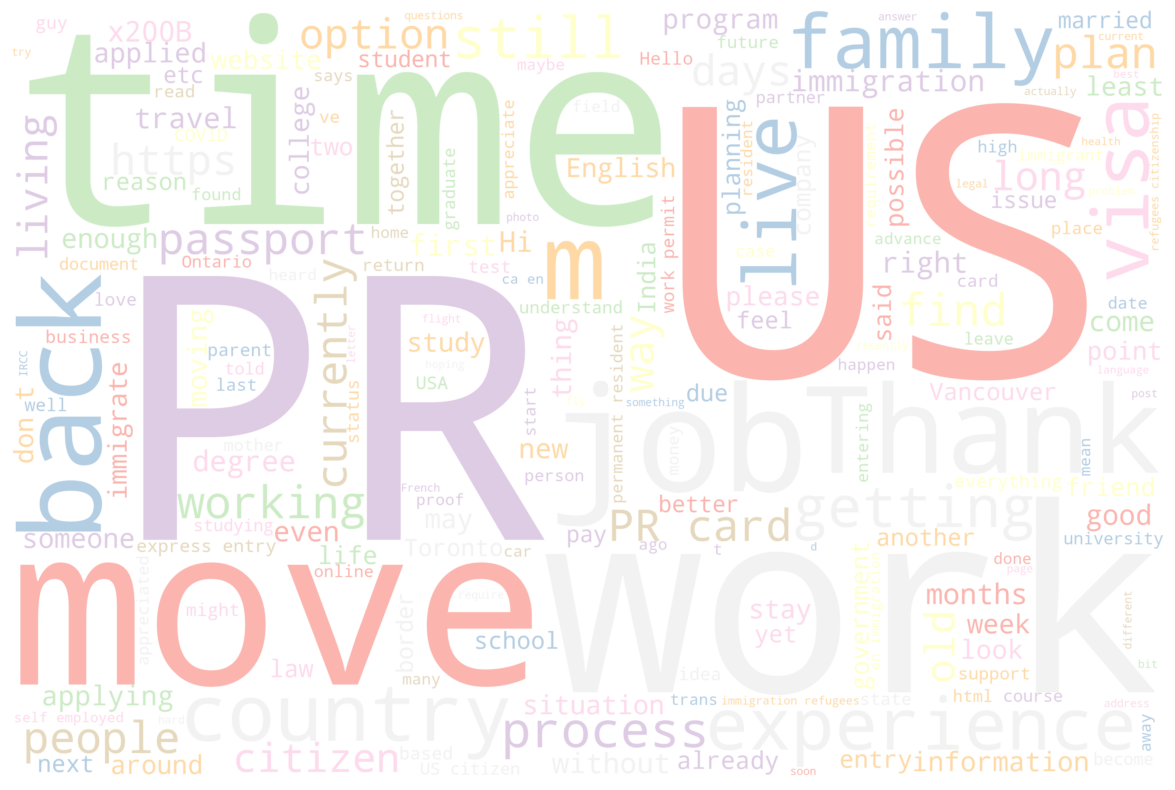

In [110]:
word_cloud(df_mixed_analysis, 'Other')

In [111]:
df_mixed_analysis.value_counts('link_flair_text')

link_flair_text
Other                     228
Express Entry             183
Study Permit              113
Work Permit               108
Sponsorship                92
nan                        89
Visitor Visa               48
Citizenship                41
PNP                        21
Quebec                     17
Public Policy pathways      9
Working Holiday             8
Meta                        1
dtype: int64

In [112]:
df_mixed_adj = df_mixed_analysis.apply(category_change, axis=1)

In [113]:
df_mixed_adj.value_counts('link_flair_text')

link_flair_text
Study Permit              416
Express Entry             183
Work Permit               122
Sponsorship                92
Visitor Visa               48
Citizenship                41
PNP                        21
Quebec                     17
Public Policy pathways      9
Working Holiday             8
Meta                        1
dtype: int64

#### Top posts

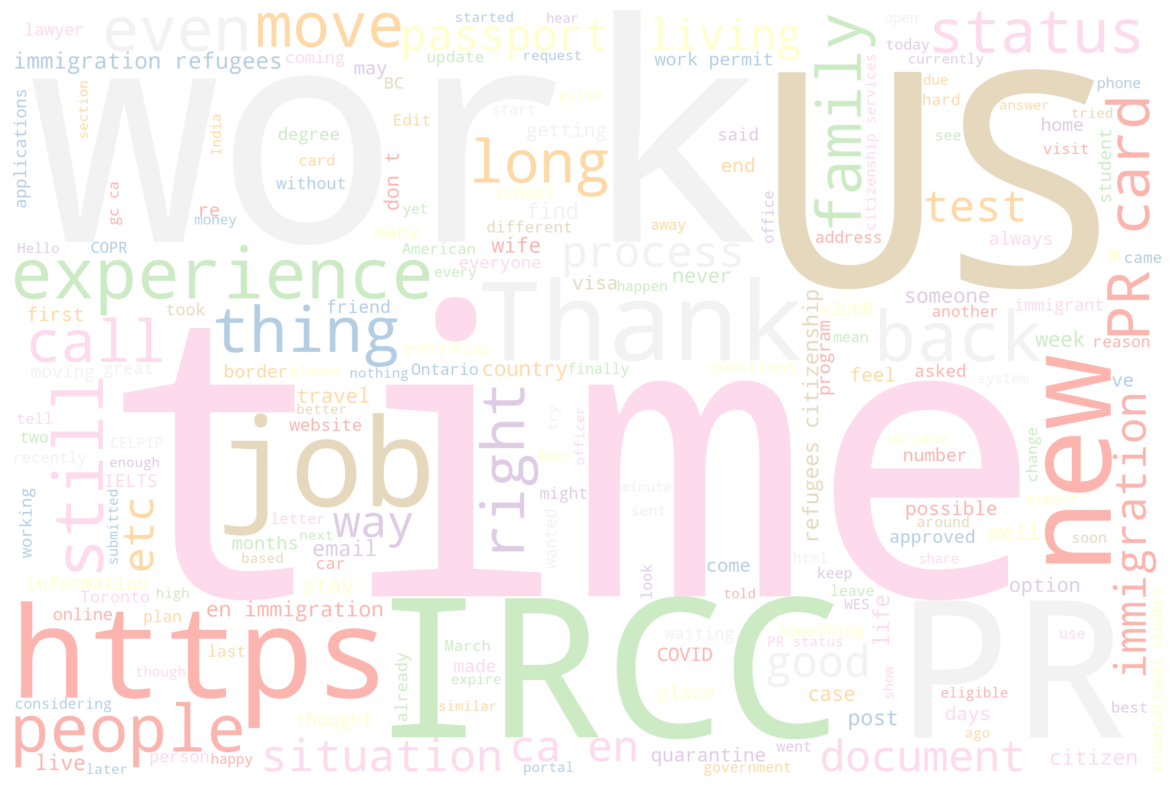

In [114]:
word_cloud(df_top_analysis, 'Other')

In [115]:
df_top_analysis.value_counts('link_flair_text')

link_flair_text
Express Entry             236
Other                     206
Work Permit                96
Study Permit               85
Sponsorship                83
nan                        59
Citizenship                48
Visitor Visa               22
PNP                        12
Meta                        9
Public Policy pathways      9
Working Holiday             6
Quebec                      5
dtype: int64

In [116]:
df_top_adj = df_top_analysis.apply(category_change, axis=1)

In [117]:
df_top_adj.value_counts('link_flair_text')

link_flair_text
Study Permit              330
Express Entry             236
Work Permit               116
Sponsorship                83
Citizenship                48
Visitor Visa               22
PNP                        12
Meta                        9
Public Policy pathways      9
Working Holiday             6
Quebec                      5
dtype: int64

In [118]:
# Categories available
all_categories = df_all_analysis['link_flair_text'].unique()
print(all_categories)

['nan' 'Working Holiday' 'Study Permit' 'Visitor Visa' 'Express Entry'
 'Other' 'Sponsorship' 'Work Permit' 'PNP' 'Quebec' 'Citizenship']


### Datetime column transformation

In [119]:
def datetime_transform(row):
    datetime_object = datetime.strptime(row['created_utc'], '%Y-%m-%d %H:%M:%S')
    row['month_utc'] = datetime_object.month
    row['year_utc'] = datetime_object.year
    row['day_utc'] = datetime_object.date
    return row

In [ ]:
df_all_adj = df_all_adj.apply(datetime_transform, axis=1)
df_mixed_adj = df_mixed_adj.apply(datetime_transform, axis=1)
df_top_adj = df_top_adj.apply(datetime_transform, axis=1)

## Data Visualization

### All posts

In [ ]:
df_all_adj.head(3)

In [ ]:
# Histogram of submissions by year
sns.histplot(df_all_adj, x='Year',linewidth=0.5)

In [ ]:
# Histogram of submissions by program requested
sns.set(rc={"figure.figsize":(15, 10)})
sns.histplot(df_all_adj, x='link_flair_text')

In [ ]:
df_all_count = df_all_adj.groupby(by=['link_flair_text', 'Year']).count()


In [ ]:
# Line plot of submissions by year and by program 
sns.lineplot(data=df_all_count, x='Year', y='created_utc', hue='link_flair_text')

In [ ]:
df_all_adj.value_counts('link_flair_text')

### Mixed opinion posts

In [ ]:
df_mixed_adj.head(5)

In [ ]:
sns.histplot(df_mixed_adj, x='year_utc')

In [ ]:
# Histogram of submissions by program requested
sns.set(rc={"figure.figsize":(20, 10)})
sns.histplot(df_mixed_adj, x='link_flair_text')

In [ ]:
df_mixed_count = df_mixed_adj.groupby(by=['link_flair_text', 'year_utc']).count()

# Line plot of submissions by year and by program 
sns.lineplot(data=df_mixed_count, x='year_utc', y='created_utc', hue='link_flair_text')

### Top posts

In [ ]:
df_top_adj.head(5)

In [ ]:
sns.histplot(df_top_adj, x='year_utc')

In [ ]:
sns.histplot(df_top_adj, x='link_flair_text')

In [ ]:
df_top_count = df_top_adj.groupby(by=['year_utc', 'link_flair_text']).count()
sns.lineplot(data=df_top_count, x='year_utc', y='created_utc', hue='link_flair_text')

## Quantitative Deliverables

### Understanding Immigration programs

#### a. Discussion of programs

In [ ]:
# Total comments per category all time
total_comments= df_all_adj.groupby(by='link_flair_text').sum()['num_comments']
total_comments.sort_values(ascending=False)

In [ ]:
# Plots of total comments by category
total_comments = total_comments.to_frame().reset_index()
sns.barplot(total_comments, x='link_flair_text', y='num_comments')

In [ ]:
# Average comments per category all time
average_comment_all = df_all_adj.groupby(by='link_flair_text').mean()['num_comments']
average_comment_all.sort_values(ascending=False)

In [ ]:
# Plots of average comments per category for all time
average_comment_all = average_comment_all.to_frame().reset_index()
average_comment_all = average_comment_all.rename(columns={'num_comments': 'avg_comments'})
sns.barplot(average_comment_all, x='link_flair_text', y='avg_comments')

In [ ]:
# Average comments per category per year
average_comments_year = df_all_adj.groupby(by=['link_flair_text', 'Year']).mean()['num_comments']
df_avg_comments = average_comments_year.to_frame().reset_index()
df_avg_comments = df_avg_comments.rename(columns={'num_comments': 'avg_comments'})

In [ ]:
year = df_avg_comments['Year'].unique().tolist()
year.sort()
for i in year:
    df_plot = df_avg_comments[df_avg_comments['Year'] == i]
    sns.barplot(df_plot, x='link_flair_text', y='avg_comments')
    plt.title(f"{i}")
    plt.show()
    

In [ ]:
sns.lineplot(df_avg_comments, x='Year', y='avg_comments', hue='link_flair_text')

#### b. Most mentioned issues

#### c. Sentimental analysis

#### d. Trends observed for programs

### Points of improvements

#### a. Contentious topics

#### b. Process pain points

#### c. Programs requires most improvements

## Visual deliverables